In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.linear_model import *
from sklearn.model_selection import *
from sklearn.metrics import *

In [2]:
d=pd.read_csv("Social_Network_Ads.csv")
df=pd.DataFrame(d)[["Gender","Age","EstimatedSalary","Purchased"]]
df.replace({"Gender":"Male"},0,inplace=True)
df.replace({"Gender":"Female"},1,inplace=True)
df.describe()

,Gender,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000,400.000000
mean,0.510000,37.655000,69742.500000,0.357500
std,0.500526,10.482877,34096.960282,0.479864
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,29.750000,43000.000000,0.000000
50%,1.000000,37.000000,70000.000000,0.000000
75%,1.000000,46.000000,88000.000000,1.000000
max,1.000000,60.000000,150000.000000,1.000000


In [3]:
X=df[["Age","EstimatedSalary"]]
Y=df["Purchased"]

x1,x2,y1,y2=train_test_split(X,Y,train_size=0.7)

In [4]:
x1

,Age,EstimatedSalary
225,37,53000
51,18,44000
339,39,122000
88,26,81000
73,33,113000
...,...,...
273,39,106000
27,47,30000
222,37,144000
292,55,39000


In [5]:
y1

225    0
51     0
339    1
88     0
73     0
      ..
273    1
27     1
222    1
292    1
48     1
Name: Purchased, Length: 280, dtype: int64

In [6]:
x2

,Age,EstimatedSalary
85,31,118000
99,28,37000
306,51,134000
135,23,63000
67,23,82000
...,...,...
20,45,22000
190,24,84000
254,50,44000
93,29,28000


In [7]:
y2

85     1
99     0
306    0
135    0
67     0
      ..
20     1
190    0
254    0
93     0
145    0
Name: Purchased, Length: 120, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Purchased'>

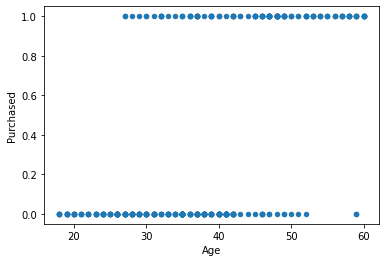

In [8]:
df.plot.scatter(x="Age",y="Purchased")

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Purchased'>

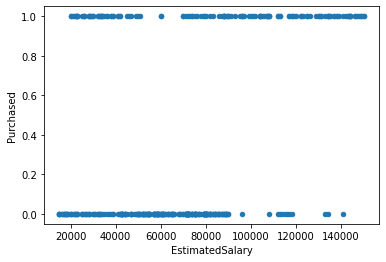

In [9]:
df.plot.scatter(x="EstimatedSalary",y="Purchased")

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

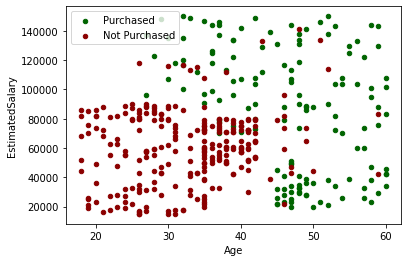

In [10]:
purchased=df[df["Purchased"]==1]
not_purchased=df[df["Purchased"]==0]
ax = purchased.plot.scatter(x="Age", y="EstimatedSalary", color="DarkGreen", label="Purchased")
not_purchased.plot.scatter(x="Age", y="EstimatedSalary", color="DarkRed", label="Not Purchased", ax=ax)

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

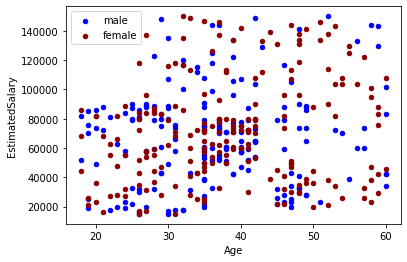

In [11]:
male=df[df["Gender"]==0]
female=df[df["Gender"]==1]
ax = male.plot.scatter(x="Age", y="EstimatedSalary", color="Blue", label="male")
female.plot.scatter(x="Age", y="EstimatedSalary", color="DarkRed", label="female", ax=ax)

In [12]:
model = LogisticRegression(fit_intercept=True,intercept_scaling=100,solver="newton-cg",max_iter=1000)
model.fit(x1, y1)
score1=model.score(x1,y1)
score2=model.score(x2,y2)
score=model.score(X,Y)
print(score,score1,score2)

0.8575 0.8535714285714285 0.8666666666666667


/usr/local/lib/python3.8/dist-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorith

In [13]:
y2_=model.predict(x2)
ny2=np.array(y2)
nx2=np.array(x2)
print("Age Est.Sal. P' P")
for i in range(len(ny2)):
    print(*nx2[i],y2_[i],ny2[i])

Age Est.Sal. P' P
31 118000 0 1
28 37000 0 0
51 134000 1 0
23 63000 0 0
23 82000 0 0
35 25000 0 0
59 42000 1 0
37 80000 0 0
29 75000 0 0
38 61000 0 0
37 33000 0 0
42 53000 0 0
28 32000 0 0
49 74000 1 0
40 60000 0 0
43 129000 1 1
26 86000 0 0
25 33000 0 0
26 118000 0 0
26 35000 0 0
23 28000 0 0
30 17000 0 0
35 59000 0 0
35 55000 0 0
37 146000 1 1
31 18000 0 0
22 55000 0 0
26 17000 0 0
31 34000 0 0
41 51000 0 0
35 73000 0 0
38 51000 0 0
41 79000 1 0
28 123000 0 1
52 150000 1 1
45 32000 0 1
48 33000 1 1
30 79000 0 0
43 112000 1 1
37 77000 0 0
53 34000 1 1
19 25000 0 0
48 131000 1 1
48 33000 1 1
24 23000 0 0
27 20000 0 0
37 57000 0 0
22 27000 0 0
31 15000 0 0
48 90000 1 1
35 75000 0 0
37 80000 0 0
48 119000 1 1
47 105000 1 1
35 44000 0 0
39 73000 0 0
41 30000 0 0
36 126000 1 1
49 89000 1 1
31 76000 0 0
39 42000 0 0
45 22000 0 1
41 87000 1 1
48 134000 1 1
25 80000 0 0
42 65000 0 0
41 72000 0 0
38 50000 0 0
32 100000 0 1
26 15000 0 0
38 112000 1 0
33 60000 0 0
36 118000 1 1
32 120000 0 1
36 

In [14]:
cm = confusion_matrix(y_true=y2, y_pred=model.predict(x2))
cm[::-1, ::-1]

array([[28,  8],
       [ 8, 76]])

/home/pict/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


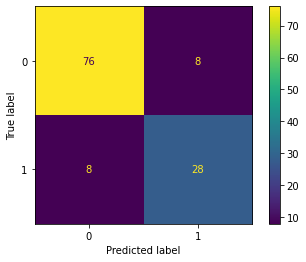

In [15]:
plot_confusion_matrix(model, x2,y2)

In [16]:
cm = confusion_matrix(y_true=y1, y_pred=model.predict(x1))
cm[::-1, ::-1]

array([[ 81,  26],
       [ 15, 158]])

/home/pict/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


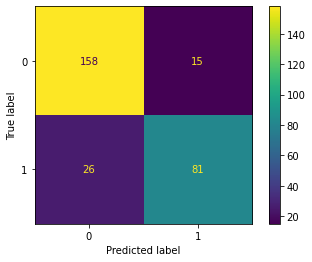

In [17]:
plot_confusion_matrix(model, x1,y1)

In [18]:
cm = confusion_matrix(y_true=Y, y_pred=model.predict(X))
cm[::-1, ::-1]

array([[109,  34],
       [ 23, 234]])

/home/pict/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


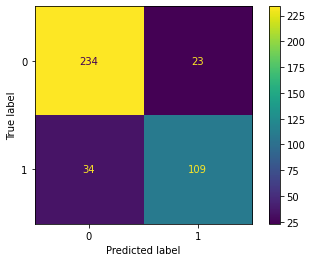

In [19]:
plot_confusion_matrix(model, X,Y)